In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [5]:
X = df.drop('Class', axis=1)  # 'Class' hedef değişken
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_test_scaled)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9232464193903782

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.96      0.94       317
    DERMASON       0.89      0.91      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.86      0.87      0.86       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723


Confusion Matrix:
 [[235   0  18   0   0   1   7]
 [  0 117   0   0   0   0   0]
 [  4   0 304   0   5   1   3]
 [  0   0   0 612   1   5  53]
 [  0   0   9   4 389   0   6]
 [  3   0   0  10   0 391   9]
 [  2   0   1  59   4   4 466]]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
labels = sorted(y.unique())


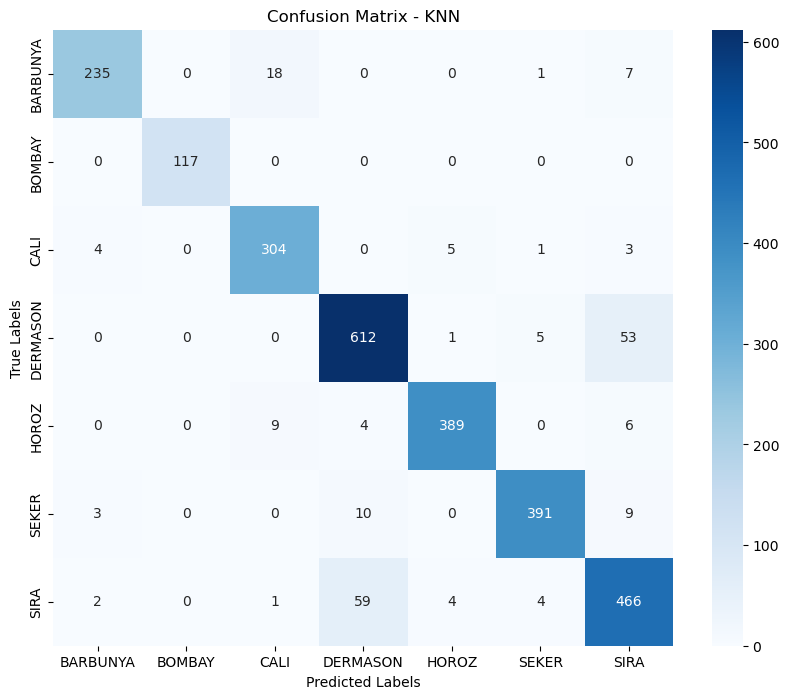

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

In [17]:
# Özellik isimlerini alalım
feature_names = X.columns

# Özellikler için minimum ve maksimum değerleri bulalım
min_values = X.min()
max_values = X.max()

# Random bir örnek oluşturalım
random_sample = np.random.uniform(low=min_values, high=max_values)

# Bunu DataFrame yapalım (özellik isimleriyle birlikte!)
random_sample_df = pd.DataFrame([random_sample], columns=feature_names)

# Standardize et
random_sample_scaled = scaler.transform(random_sample_df)

# Tahmin yapalım
predicted_class = knn.predict(random_sample_scaled)

print("Random Üretilen Örnek Değerler:")
print(random_sample_df)
print("\nTahmin Edilen Sınıf:", predicted_class[0])


Random Üretilen Örnek Değerler:
            Area   Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  194766.003739  798.107086       593.946092       287.564836      2.079446   

   Eccentricity     ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0       0.83828  127694.951645     242.404801  0.828848  0.930537   0.969889   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.922331      0.005598      0.001613      0.957338      0.981319  

Tahmin Edilen Sınıf: CALI
